In [1]:
%run AdventUtils-norvig-pytudes.ipynb

# [Day 10](https://adventofcode.com/2024/day/10): Hoof It

Today's input is a topological map, with digits indicating the elevation of each terrain position.

In [2]:
topo = Grid(parse(10, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 54 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
567212105457654598212321234810354563543243210498768987
438903012368763285103410898901243432654158910347698876
327654789879100176501543487432382561783067681256580560
012789632101290125432692576545691070892101098545671421
231076541087389034898781987036788989787012147676542334
122345980196476945109650670129867875632103456789430945
034123670145565876212340548910058921945314967856321876
965014561234014212343211237432143430876465878947816543
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 54 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(5, 6, 7, 2, 1, 2, 1, 0, 5, 4, 5, 7, 6, 5, 4, 5, 9, 8, 2, 1, 2, 3, 2, 1, 2, 3, 4, 8, 1, 0, 3,

### Part 1: What is the sum of the scores of all trailheads on your topographic map?

A **trailhead** is any position with elevation  0, and a **peak** is any position with elevation 9. The **score** of a trailhead is the number of peaks that can be reached by following a path where each step increases the elevation by exactly 1. All moves are in one of the four cardinal directions (north/south/east/west).

I'll keep a set of points on the frontier of possible paths, updating this set on each iteratation from 1 to 9, by looking at each point on the frontier and seeing which of the neighboring points `p` have the right elevation:

In [3]:
def score(topo: Grid, trailhead: Point) -> int:
    """How many peaks can be reached from this trailhead?"""
    frontier = {trailhead}
    for elevation in range(1, 10):
        frontier = {p for p in union(map(topo.neighbors, frontier))
                    if topo[p] == elevation}
    return len(frontier)

In [4]:
answer(10.1, 709, lambda:
       sum(score(topo, head) for head in topo.findall([0])))

Puzzle 10.1:   .0208 seconds, answer 709             ok

### Part 2: What is the sum of the ratings of all trailheads?

The **rating** of a trailhead is the number of distinct paths from the trailhead to a peak.

As in Part 1, I'll keep a frontier and update it on each iteration from 1 to 9, but this time the frontier will be a counter of `{position: count}` where the count indicates the number of paths to that position. On each iteration I'll look at each point `f` on the frontier and see which of the neighboring points `p` have the right elevation, and increment the counts for those points by the count for `f`. This approach is linear in the number of positions, whereas if I followed all possible paths depth-first there could be an exponential number of paths.

In [5]:
def rating(topo: Grid, trailhead: Point) -> int:
    """How many distinct paths are there from this trailhead to any peak?"""
    frontier = Counter({trailhead: 1})
    for elevation in range(1, 10):
        frontier = accumulate((p, frontier[f]) 
                              for f in frontier
                              for p in topo.neighbors(f) if topo[p] == elevation)
    return sum(frontier.values())

In [6]:
answer(10.2, 1326, lambda:
       sum(rating(topo, head) for head in topo.findall([0])))

Puzzle 10.2:   .0300 seconds, answer 1326            ok

Here's a visualization of the map:

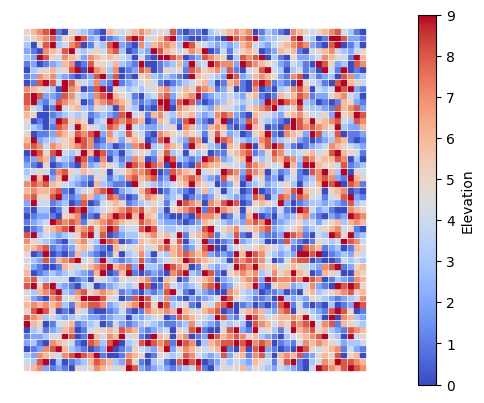

In [7]:
def plot_topo(topo: Grid):
    """Show the map with a colormap from blue to red."""
    plt.figure()
    scatter = plt.scatter(Xs(topo), Ys(topo), c=list(topo.values()), 
                          cmap='coolwarm', marker='s', s=12)
    plt.colorbar(scatter, label='Elevation')
    plt.axis('square')
    plt.axis('off')

plot_topo(topo)